In [12]:
# Reference: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# 1. Load and normalize CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


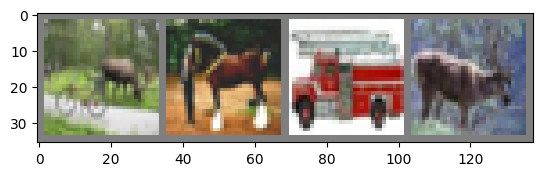

deer  horse truck deer 


In [14]:
# Let us show some of the training images, for fun.
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [15]:
# 2. Define a Convolutional Neural Network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [16]:
# 3. Define a Loss function and optimizer
# Let’s use a Classification Cross-Entropy loss and SGD with momentum.
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
# 4. Train the network
# This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.264
[1,  4000] loss: 1.266
[1,  6000] loss: 1.244
[1,  8000] loss: 1.263
[1, 10000] loss: 1.267
[1, 12000] loss: 1.255
[2,  2000] loss: 1.269
[2,  4000] loss: 1.261
[2,  6000] loss: 1.274
[2,  8000] loss: 1.246
[2, 10000] loss: 1.259
[2, 12000] loss: 1.257
[3,  2000] loss: 1.245
[3,  4000] loss: 1.259
[3,  6000] loss: 1.269
[3,  8000] loss: 1.285
[3, 10000] loss: 1.263
[3, 12000] loss: 1.254
[4,  2000] loss: 1.254
[4,  4000] loss: 1.268
[4,  6000] loss: 1.256
[4,  8000] loss: 1.254
[4, 10000] loss: 1.261
[4, 12000] loss: 1.268
[5,  2000] loss: 1.251
[5,  4000] loss: 1.248
[5,  6000] loss: 1.285
[5,  8000] loss: 1.266
[5, 10000] loss: 1.242
[5, 12000] loss: 1.274
[6,  2000] loss: 1.255
[6,  4000] loss: 1.248
[6,  6000] loss: 1.263
[6,  8000] loss: 1.260
[6, 10000] loss: 1.251
[6, 12000] loss: 1.287
[7,  2000] loss: 1.257
[7,  4000] loss: 1.262
[7,  6000] loss: 1.255
[7,  8000] loss: 1.270
[7, 10000] loss: 1.259
[7, 12000] loss: 1.262
[8,  2000] loss: 1.255
[8,  4000] 

In [2]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

NameError: name 'torch' is not defined

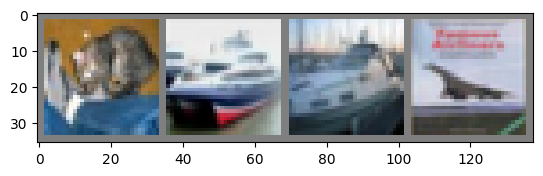

GroundTruth:  cat   ship  ship  plane


In [28]:
# 5. Test the network on the test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [19]:
# Next, let’s load back in our saved model (note: saving and re-loading the model wasn’t necessary here, we only did it to illustrate how to do so):
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [30]:
outputs = net(images)

In [31]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   ship  plane


In [42]:
# Let us look at how the network performs on the whole dataset.
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 52 %


In [43]:
# Hmmm, what are the classes that performed well, and the classes that did not perform well:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 49.3 %
Accuracy for class: car   is 77.3 %
Accuracy for class: bird  is 25.1 %
Accuracy for class: cat   is 34.0 %
Accuracy for class: deer  is 39.7 %
Accuracy for class: dog   is 75.1 %
Accuracy for class: frog  is 62.1 %
Accuracy for class: horse is 46.7 %
Accuracy for class: ship  is 75.0 %
Accuracy for class: truck is 42.6 %
